# **LIMPEZA E ANÁLISE DE DADOS: HISTÓRICO DAS OLIMPÍADAS MODERNAS**
## Autora: Isabella Soares Camareli
---

As Olimpíadas são uma das maiores competições multiesportivas internacionais do mundo, cuja origem remonta à Grécia Antiga, quando eram praticados jogos esportivos na cidade de Olímpia.

Nessa análise, serão priorizados os aspectos de diferença de participação entre os sexos no evento, visando explorar as origens e causas para tal.

Além disso, observar a relação total do ganho de medalhas pelos países que competiram, desde 1896, data da primeira olimpíada moderna, até o ano de 2016.


In [1]:
# importando as bibliotecas para análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando o dataset
df = pd.read_csv('df_athlete_events.csv')
df.head(10)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [3]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [4]:
df.describe(include=['object'])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


## **Procurando erros nos dados categóricos**

In [7]:
# Procurando duplicatas 
duplicados = df[df.duplicated()]
print(duplicados)

       Athlete_ID                                           Name Sex   Age  \
3608        12115                          Gaston Frdric Blanchy   M  31.0   
6130        19874            Jean-Baptiste tienne August Charcot   M  23.0   
9239        29661                                 Jacques Doucet   M   NaN   
10521       33564                           William Edgar Exshaw   M  34.0   
13044       40973                         Victor Auguste Godinet   M  47.0   
22419       67525                           Jacques le Lavasseur   M   NaN   
23432       70374                                Robert Linzeler   M  28.0   
25876       77710                           Robert Tait McKenzie   M  65.0   
25877       77710                           Robert Tait McKenzie   M  65.0   
26411       79304  Mathias Joseph Ferdinand Jules Henri Mialaret   M  44.0   
38828      116681                         Henri Lon Victor Susse   M  55.0   
39805      119448                                       Texier I

In [8]:
# Removendo duplicatas
df.drop_duplicates(inplace=True) 

In [9]:
# PROCURANDO ERROS NOS DADOS CATEGÓRICOS:

# pd.Series(df.Games.unique())
# pd.Series(df.City.unique())
# pd.Series(df.Sport.unique())
# pd.Series(df.Event.unique())
# pd.Series(df.NOC.unique())
# pd.Series(df.Team.unique()) # ele nao etc
# pd.Series(df.Season.unique()) # ele nao etc
# pd.Series(df.Medal.unique()) # medalha Nelson
# pd.Series(df.Sex.unique()) # vic e P&D

## Trocando dados categóricos

In [10]:
df['Sex'].replace("FEMALE", "F", inplace=True)
df['Sex'].replace("MALE", "M", inplace=True)
df['Sex'].replace("Vic vai te dar um socao", "M", inplace=True)
df['Sex'].replace("P&D >> Comunidade", "F", inplace=True)
pd.Series(df.Sex.unique())

0    M
1    F
dtype: object

In [11]:
# len(df[df['Medal'] == 'Nelson']) #166 linhas com medalhas Nelson
df['Medal'].replace('Nelson', df['Medal'].mode()[0], inplace=True)

In [12]:
pd.Series(df.Team.unique())

0      Denmark/Sweden
1       United States
2             Finland
3              Norway
4         Netherlands
            ...      
597           Satchmo
598         Sea Dog-2
599          Scotland
600         Bohemia-2
601             Digby
Length: 602, dtype: object

In [13]:
pd.Series(df.Season.unique()) # #ForaBolsonaro, Ele não, Ele nunca

0            Summer
1            Winter
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object

In [14]:
df.drop(df.loc[df['Team']=='#ForaBolsonaro'].index, inplace=True)
df.drop(df.loc[df['Team']=='Ele não'].index, inplace=True)
df.drop(df.loc[df['Team']=='Ele nunca'].index, inplace=True)

In [15]:
df.drop(df.loc[df['Season']=='#ForaBolsonaro'].index, inplace=True)
df.drop(df.loc[df['Season']=='Ele não'].index, inplace=True)
df.drop(df.loc[df['Season']=='Ele nunca'].index, inplace=True)

## **Procurando erros nos dados numéricos**

In [17]:
# pd.Series(df.Age.unique())
# pd.Series(df.Height.unique()) # valores errados
# pd.Series(df.Weight.unique()) # está como object e contém valores errados
# pd.Series(df.Year.unique()) # valores errados
df.describe()

,Athlete_ID,Age,Height,Year
count,45402.000000,44433.000000,3.541400e+04,45402.000000
mean,69127.445024,25.852407,9.760103e+02,1972.345381
std,38873.640416,5.953476,3.453244e+04,94.347961
min,4.000000,10.000000,1.320000e+02,-2992.000000
25%,36095.500000,22.000000,1.700000e+02,1952.000000
50%,68629.500000,25.000000,1.780000e+02,1984.000000
75%,103192.000000,29.000000,1.850000e+02,2002.000000
max,135563.000000,73.000000,1.976779e+06,2016.000000


## Trocando dados numéricos

In [18]:
# pd.Series(df.Weight.unique()) # Está como object e corrigindo valores errados
df["Weight"].replace("hsuahusahu", df["Weight"].mode()[0], inplace=True)
df["Weight"] = df["Weight"].astype(float)

In [21]:
# pd.Series(df.Height.unique()) # Corrigindo valores errados
for i in df.index:
  if df["Height"][i] > 250:
    df["Height"] = df["Height"].replace(df["Height"][i], df["Height"].mode()[0])

df.fillna(value = {"Height": df["Height"].mean()}, inplace = True)

df["Height"] = df["Height"].astype("int64")

C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

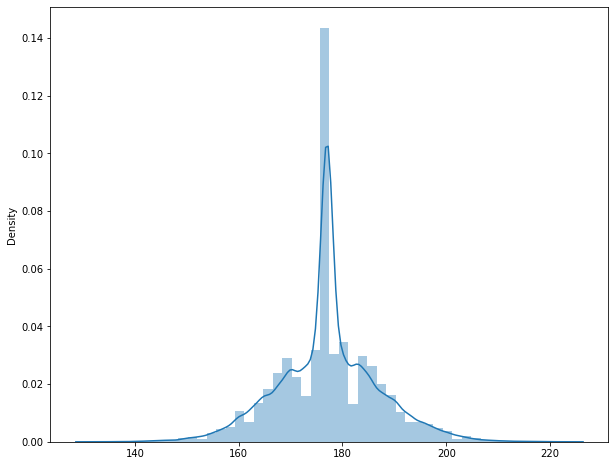

In [22]:
# Conferindo limpeza
plt.figure(figsize=(10,8))
sns.distplot(x=df["Height"].dropna())
plt.show

In [23]:
# pd.Series(df.Year.unique()) #  corrigindo valores errados
df = df[df["Year"] > 1896]
df = df[df["Year"] < 2016]

C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

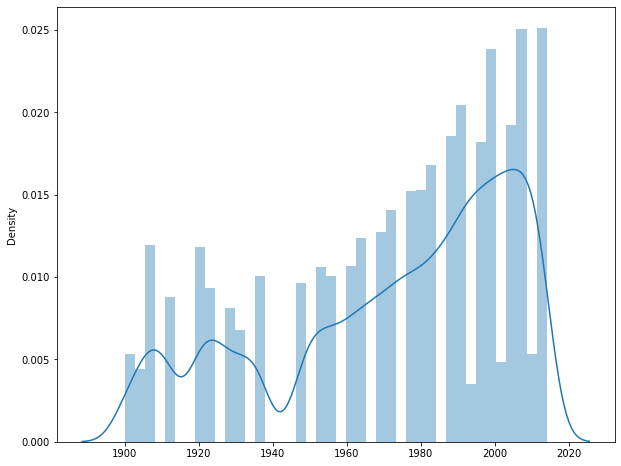

In [24]:
# Conferindo limpeza
plt.figure(figsize=(10,8))
sns.distplot(x=df["Year"].dropna())
plt.show

# **INÍCIO DA ANÁLISE**

---

## **Gráfico do número de atletas, por sexo, que já participaram das Olimpíadas**

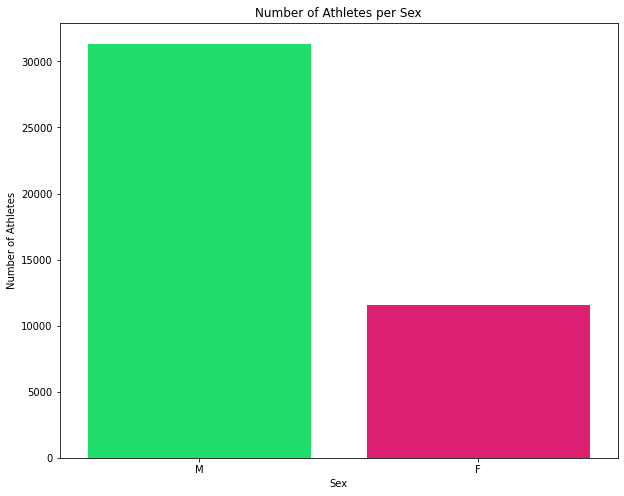

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Sex"], palette=["#00FE64", "#FE006F"])
sns.color_palette()
plt.xlabel("Sex")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes per Sex")
plt.show()

## **Gráfico do número de medalhas ganhas por atletas distribuidos por idade e sexo**

<Figure size 1584x1440 with 0 Axes>

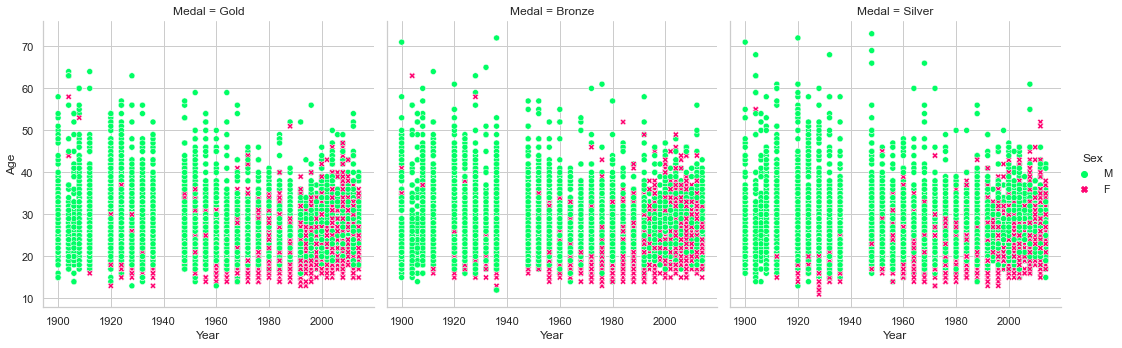

In [25]:
plt.figure(figsize=(22,20))
sns.set_theme(style="whitegrid")
hue_colors= {"M":"#00FE64", "F":"#FE006F"}
sns.relplot(data= df, x= "Year", y="Age" , col= "Medal", hue= "Sex", style= "Sex", palette=hue_colors)
plt.show()

## **Gráfico da distribuição de atletas por modalidade e sexo**

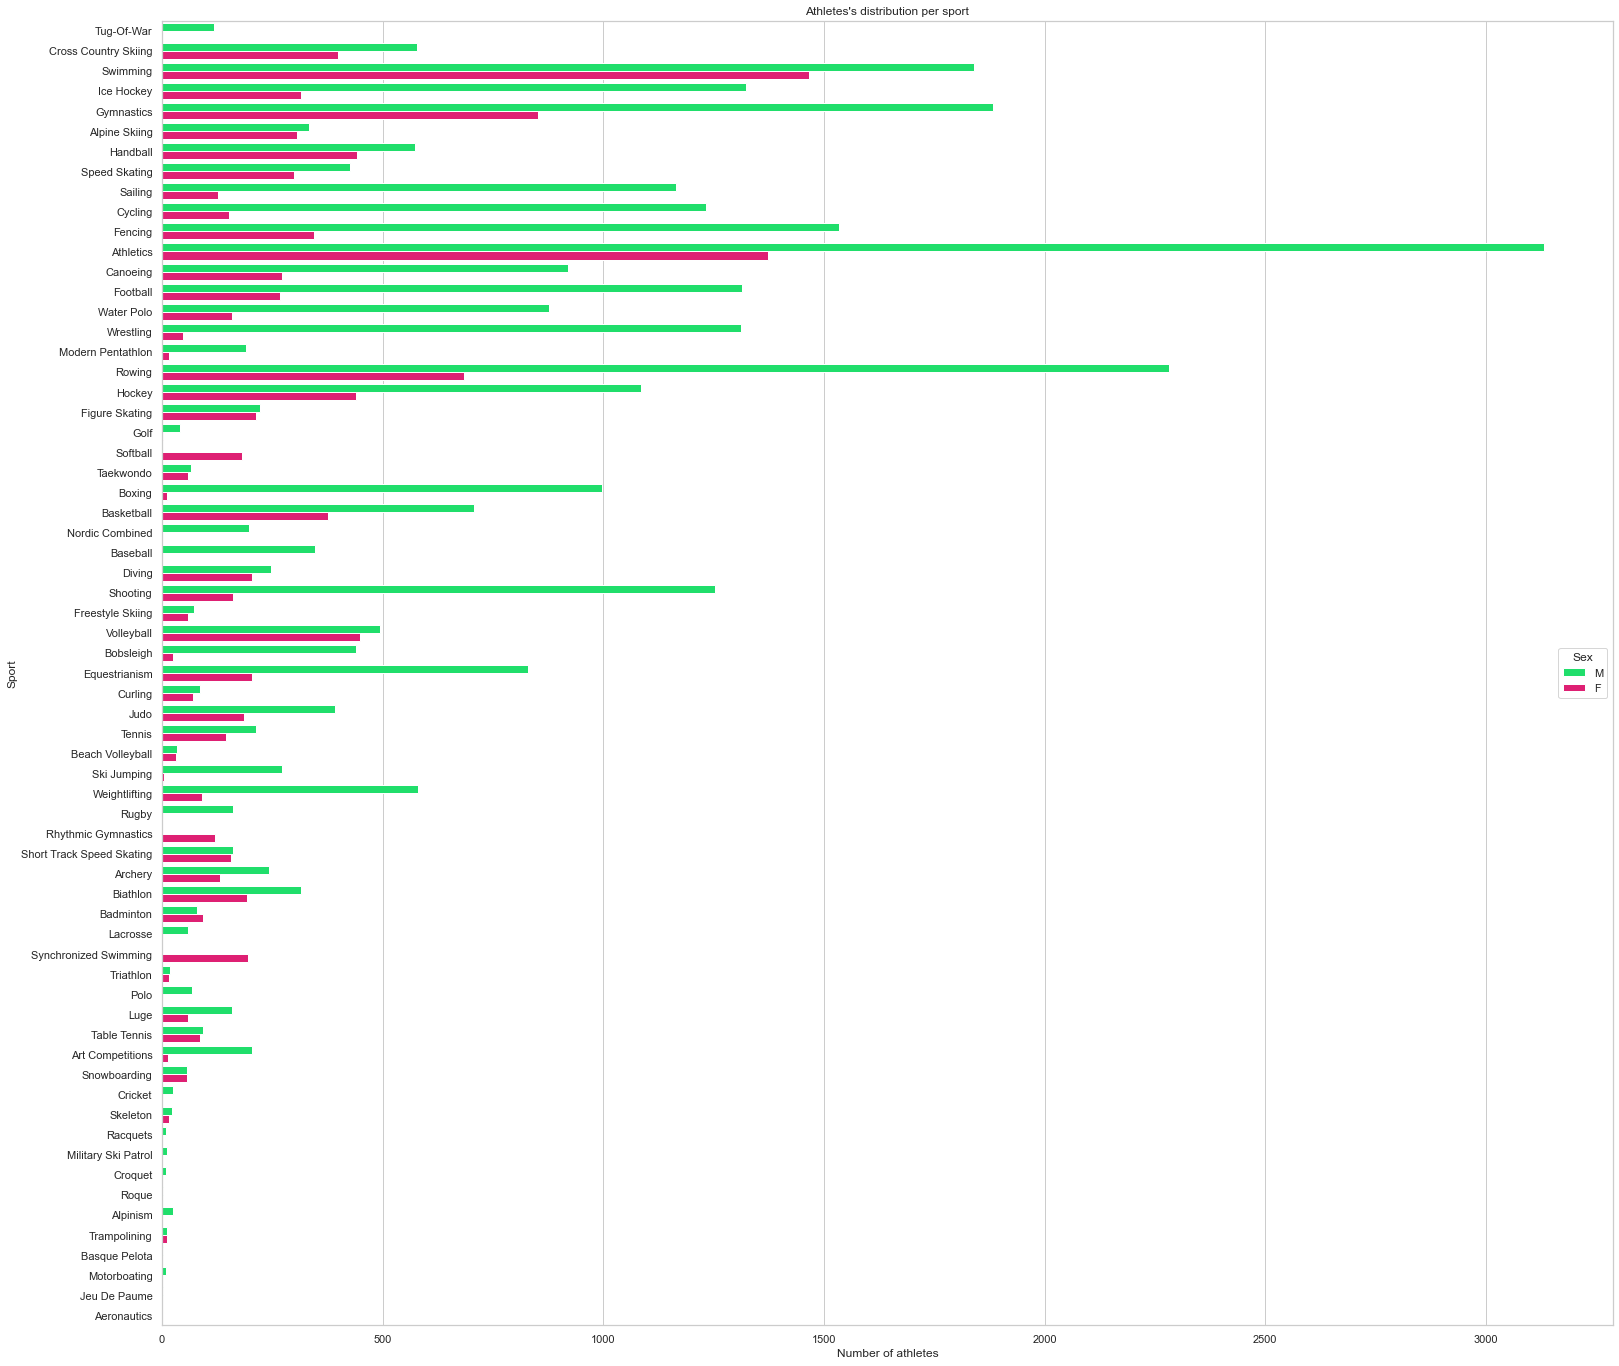

In [26]:
plt.figure(figsize=(26,24))
hue_colors= {"M":"#00FE64", "F":"#FE006F"}
sns.countplot(y=df["Sport"], hue= df["Sex"], palette=hue_colors)
plt.xlabel("Number of athletes")
plt.ylabel("Sport")
plt.title("Athletes's distribution per sport")
plt.show()

A partir dos gráficos acima, é possível perceber a diferença no número total de homens e mulheres que já participaram das Olimpíadas. Isso se dá em consequência da proibição do envolvimento feminino na competição, que se alterou **de fato** apenas no ano de 1920, mesmo que de forma extremamente pequena. Leia mais sobre a trajetória feminina nas Olimpíadas com mais detalhes [aqui]( https://sae.digital/mulheres-nas-olimpiadas/). Dessa forma, com o passar dos anos, e com maior destaque e valorização das pautas feministas, atualmente o número está mais equilibrado, porém ainda existem outros dados que saltam aos olhos. 

No segundo gráfico, que contabiliza o número de medalhas recebidas por atletas e distribuidas etariamente, é possível observar a diferença de idade entre os homens e mulheres que competiram nos jogos. Dessa maneira, nota-se que, mesmo nos últimos anos, o número de mulheres abaixo da linha dos 30 anos é exacerbadamente menor que o número de homens.

Além disso, também é plausível constatar que elas iniciam sua carreira olímpica muito antes dos homens, uma vez que abaixo da linha dos 20 anos está quase completamente dominada pelo sexo feminino.

No terceiro gráfico, observa-se a distribuição dos atletas de acordo com a modalidade praticada, e não mostra predominio feminina em esporte algum, relacionado à quantidade de homens, o que poderia de alguma maneira justificar o contraste nas faixas etárias, conforme o rendimento físico do atleta, por exemplo.

À vista disso, uma hipótese possível para explicar essa disparidade nas idades pode ser, dentre outros motivos, em vistude da problemática social intrínseca à relação entre maternidade e carreira profissional, tendo em vista que, mesmo nos dias atuais, essa questão carrega muitos estigmas e pouca proteção para as mulheres durante essa etapa. Um exemplo disso é a atleta estadunidense Allyson Felix, a maior medalhista da história do atletismo olímpico na contemporaneidade, mas que após se tornar mãe, a Nike, empresa responsável pelo seu maior patrocínio, fez uma proposta com o valor **70% menor** do que o que estava sendo negociado previamente. Leia com detalhes [aqui]( https://conexaoplaneta.com.br/blog/allyson-felix-provou-que-a-maternidade-nao-foi-empecilho-para-ela-se-tornar-a-maior-medalhista-da-historia-do-atletismo-olimpico/).


## **Distribuição de medalhas por países**

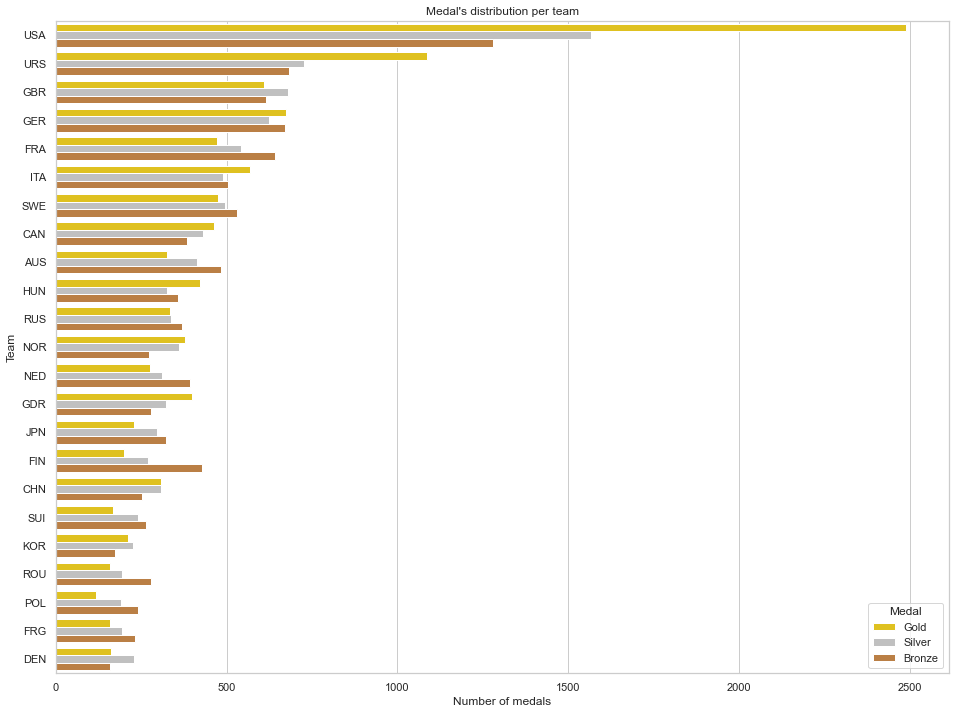

In [24]:
plt.figure(figsize=(16,12))
hue_colors = {"Gold": "#FFD700", "Silver": "#C0C0C0", "Bronze": "#CD7F32"}
sns.set_theme(style="whitegrid")
sns.countplot(y=df["NOC"],hue= df["Medal"], hue_order=['Gold', 'Silver', 'Bronze'], order = df["NOC"].value_counts().index, palette=hue_colors)
plt.xlabel("Number of medals")
plt.ylabel("Team")
plt.title("Medal's distribution per team")
plt.ylim(22.5)
plt.show()

No gráfico acima, pode-se observar o número de medalhas acumuladas ao longo dos anos por alguns países. Os Estados Unidos da América então notoriamente em destaque, principalmente pela quantidade de medalhas de ouro conquistadas pelo mesmo. 

Dentre outros motivos, isso advém da quantidade de investimentos do país em esportes, além do desenvolvimento do próprio país, tendo em vista que outras potências como a antiga União das Repúblicas Socialistas Soviéticas, a Alemanha, a Itália, a Austrália, o Canadá e outros também se ressaltam no topo do gráfico, com grande quantidade de medalhas ganhadas.

# **CONCLUSÕES**
---

Dessa forma, com o presente projeto pude aprender e trabalhar minhas capacidades de limpeza e análise de dados, por meio das bibliotecas numpy, pandas, matplotlib e seaborn. Através dessa análise, foi possível concluir que o data set observado se encontrava dentro da normalidade. Os jogos olímpicos passaram por diversas mudanças, com destaque para algumas tendências análisadas já justificadas. Além disso, também existem outros dados que podem ser observados e relacionados a longo prazo.